In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv("u.data.csv",sep='|',names="user_id,item_id,rating,timestamp".split(","))
dataset=dataset.drop('timestamp',axis=1)

dataset = dataset.iloc[1:,:]


In [54]:
dataset.head()

,user_id,item_id,rating
1,196,242,3
2,186,302,3
3,22,377,1
4,244,51,2
5,166,346,1


In [4]:
sum(m>0)

array([452, 131,  90, ...,   1,   1,   1])

In [3]:
m = np.zeros((943,1682),dtype=np.int8)
for i in range(len(dataset)):
    m[int(dataset.iloc[i,0])-1,int(dataset.iloc[i,1])-1]=int(dataset.iloc[i,2])

In [57]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [58]:
dataset.head()

,user_id,item_id,rating
1,107,842,3
2,96,909,3
3,134,991,1
4,161,1139,2
5,74,957,1


In [59]:
len(dataset.user_id.unique()), len(dataset.item_id.unique())


(943, 1682)

In [60]:
dataset = dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [61]:
dataset.isnull().any()

user_id    False
item_id    False
rating     False
dtype: bool

In [62]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

In [63]:
len(train)

80000

In [11]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
from keras import regularizers

n_users, n_movies = len(dataset.user_id.unique()), len(dataset.item_id.unique())
n_latent_factors = 3

Using TensorFlow backend.


In [12]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, 3, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, 3,name='User-Embedding')(user_input))


result = keras.layers.merge([movie_vec, user_vec], mode='dot',name='dot')


model = keras.Model([user_input, movie_input], result)

model.compile(optimizer='adam',loss= 'mean_squared_error')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [13]:
import graphviz

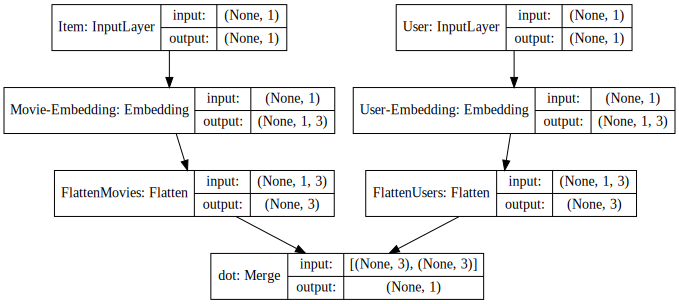

In [15]:
from keras.utils.vis_utils import plot_model
from IPython.display import SVG
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [16]:
#import tensorflow as tf
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

#tf.Session(config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True))

In [17]:
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100)

Epoch 1/100
79487/79487 [==============================] - 13s 161us/step - loss: 12.1744
Epoch 2/100
79487/79487 [==============================] - 9s 113us/step - loss: 4.6896
Epoch 3/100
79487/79487 [==============================] - 9s 113us/step - loss: 1.9704
Epoch 4/100
79487/79487 [==============================] - 9s 113us/step - loss: 1.3299
Epoch 5/100
79487/79487 [==============================] - 9s 113us/step - loss: 1.0935
Epoch 6/100
79487/79487 [==============================] - 9s 113us/step - loss: 0.9913
Epoch 7/100
79487/79487 [==============================] - 9s 112us/step - loss: 0.9423
Epoch 8/100
79487/79487 [==============================] - 9s 112us/step - loss: 0.9160
Epoch 9/100
79487/79487 [==============================] - 9s 112us/step - loss: 0.9015
Epoch 10/100
79487/79487 [==============================] - 9s 112us/step - loss: 0.8920
Epoch 11/100
79487/79487 [==============================] - 9s 113us/step - loss: 0.8855
Epoch 12/100
79487/79487 [==

Epoch 93/100
79487/79487 [==============================] - 9s 116us/step - loss: 0.7171
Epoch 94/100
79487/79487 [==============================] - 10s 124us/step - loss: 0.7169
Epoch 95/100
79487/79487 [==============================] - 10s 120us/step - loss: 0.7164
Epoch 96/100
79487/79487 [==============================] - 9s 115us/step - loss: 0.7167
Epoch 97/100
79487/79487 [==============================] - 9s 119us/step - loss: 0.7160
Epoch 98/100
79487/79487 [==============================] - 9s 114us/step - loss: 0.7158
Epoch 99/100
79487/79487 [==============================] - 9s 115us/step - loss: 0.7156
Epoch 100/100
79487/79487 [==============================] - 9s 118us/step - loss: 0.7152


In [18]:
y_hat = model.predict([test.user_id, test.item_id])
y_true = test.rating

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, np.round(y_hat))

0.6889090177133655